# Fast Fourier Tranform

In [1]:
import librosa
import librosa.display
import IPython.display as ipd
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

In [12]:
audio_path = "audio-data/instruments/piano_c.wav"
ipd.Audio(audio_path)

In [3]:
signal,sr = librosa.load(audio_path)


In [4]:
print(sr)

22050


In [6]:
print(len(signal))

33968


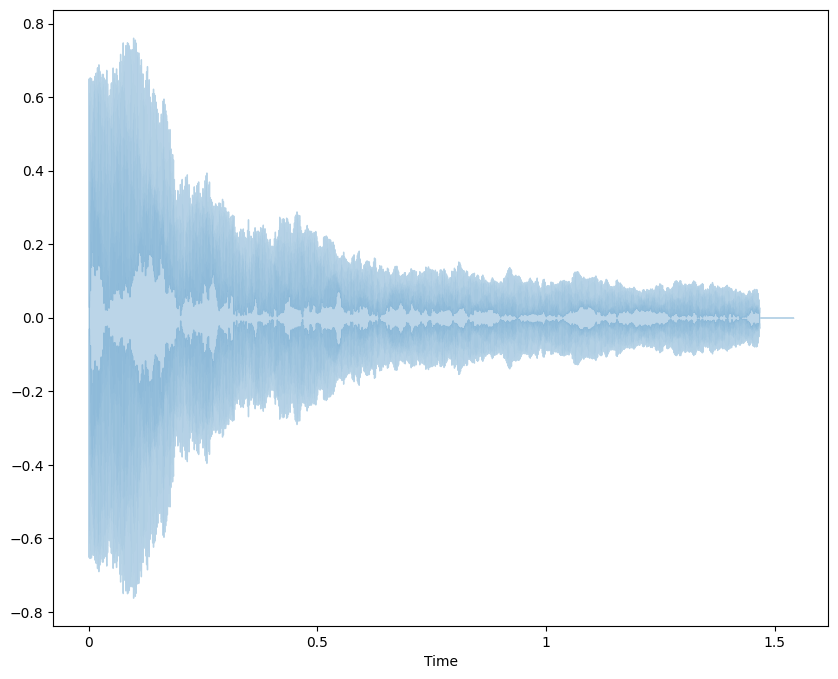

In [8]:
# plot the waveform
plt.figure(figsize=(10,8))
librosa.display.waveshow(signal,sr=sr,alpha=0.3)
plt.show()

In [9]:
# derive spectrum using FFT
ft = sp.fft.fft(signal)
magnitude = np.absolute(ft)
frequency = np.linspace(0,sr,len(magnitude))

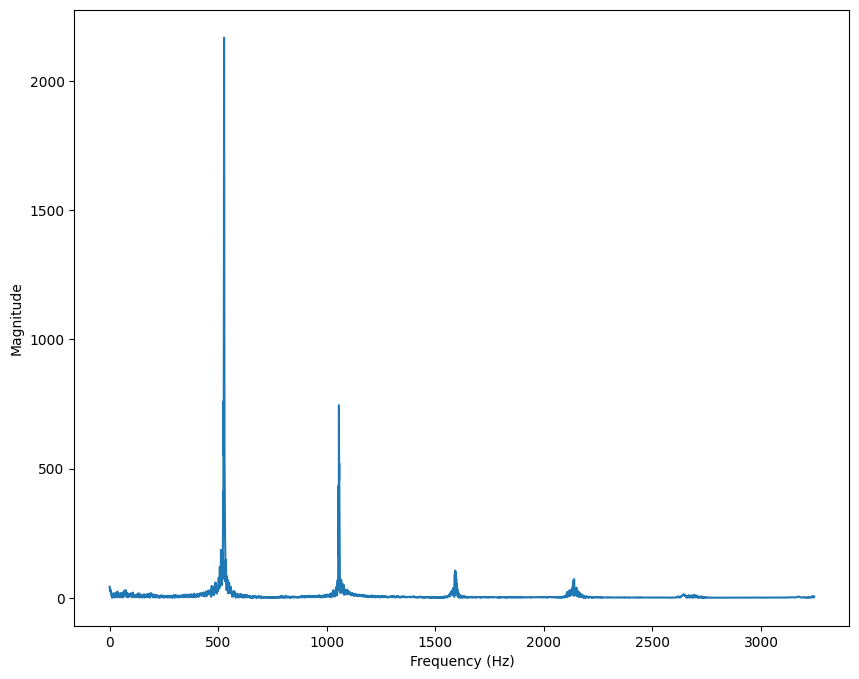

In [13]:
# plot the spectrum
plt.figure(figsize=(10,8))
plt.plot(frequency[:5000],magnitude[:5000])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

In [16]:
# duration of each sample
d = 1/sr
print(d)

4.5351473922902495e-05


In [20]:
# Lets find the cycle for the fundamental frequency
d_523 = 1/523 # 523 is the fundamental frequency
print("Seconds : ",d_523) 

milliseconds :  0.0019120458891013384


In [21]:
# Lets zoom into the samples
d_400_samples = 400*d
print("Seconds:",d_400_samples)

Seconds: 0.018140589569160998


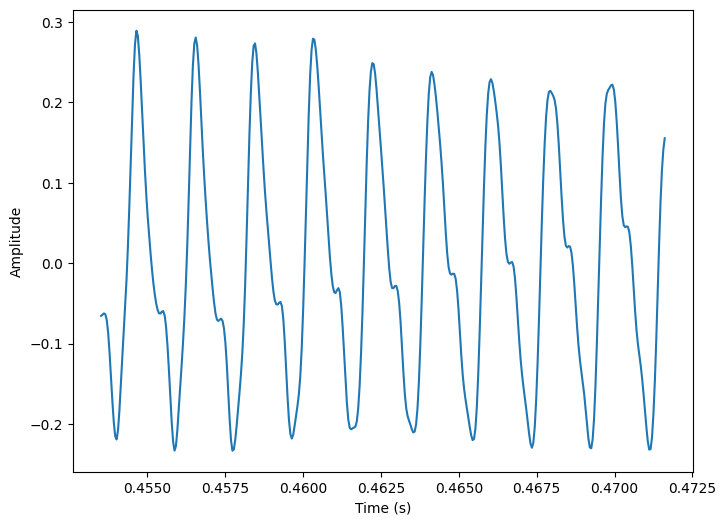

In [24]:
# Zooming into the waveform
samples = range(len(signal))
t = librosa.samples_to_time(samples,sr=sr)

plt.figure(figsize=(8,6))
plt.plot(t[10000:10400],signal[10000:10400])
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

# What we want to do using the above zoomed in signal is to compare it with diffent sinusoids and see which one match

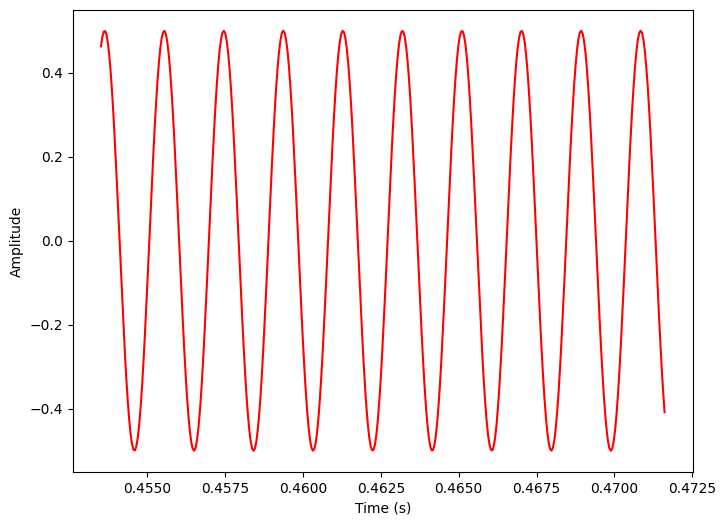

In [25]:
# Create a sinusoid
f = 523
phase = 0
sin = 0.5 * np.sin(2*np.pi * (f*t-phase))
plt.figure(figsize=(8,6))
plt.plot(t[10000:10400],sin[10000:10400],color='r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

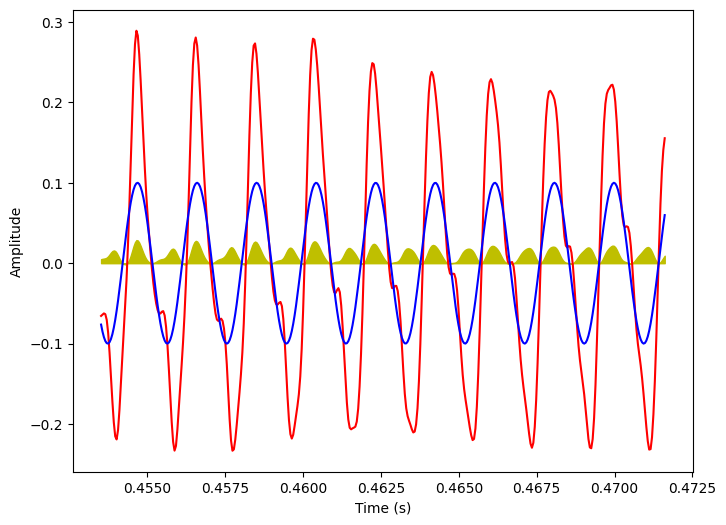

In [36]:
# Compare signal and sinusoids
f = 523
phase = 0.55
sin = 0.1 * np.sin(2*np.pi * (f*t-phase))
plt.figure(figsize=(8,6))
plt.plot(t[10000:10400],signal[10000:10400],color='r')
plt.plot(t[10000:10400],sin[10000:10400],color='b')
# fill  gaps
plt.fill_between(t[10000:10400],sin[10000:10400]*signal[10000:10400],color = 'y')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In [2]:
# The yellow area shows how much similarty or dissimilarty there is
# Hence using the yellow part we can safely pick a frequnecy showing high 
# magnitude. And we can conclude this is a correct frequency
